**Припустимо, що у вас є багатошаровий перцептрон, що складається з одного вхідного
шару з 10 нейронами, за яким є ще один прихований шар з 50 нейронами і один
вихідний шар з 3 нейронами. Всі штучні нейрони застосовують функцію активації
ReLU.**

**Яка форма вхідної матриці X?**

Вектор довжиною 10

**Що можна сказати про форму вектора ваг
W_h
прихованого шару?**

50x10

**... і формі його вектора зсувів b_h?**

50x1

**Яка форма вектора ваг
W_0
вихідного шару?**

3x50

**... і форма його вектора зсувів
b_0?**

3x1

**Яка форма вихідної матриці
Y
мережі?**

3x1

**Напишіть рівняння, яке обчислює вихідну матрицю Y мережі як функцію від X , W_h, b_H, W_0 та b_0.**

$Y=f(W_0 * f(W_h * X + b_h) + b_0)$

$Y=max(0, W_0 * max(0, W_h * X + b_h) + b_0)$

In [ ]:
import keras
from keras.datasets import mnist
import keras.models as M
import keras.layers as L
import keras.backend as K

In [ ]:
from sklearn.metrics import accuracy_score
(x_train, y_train), (x_val, y_val) = keras.datasets.fashion_mnist.load_data()
y_train_oh = tf.keras.utils.to_categorical(y_train, 10)
y_val_oh = tf.keras.utils.to_categorical(y_val, 10)

In [ ]:
x_train_float = x_train.astype(np.float) / 255 - 0.5
x_val_float = x_val.astype(np.float) / 255 - 0.5

results = []

for func in ['linear', 'elu', 'softmax', 'sigmoid']:
  print("Activation function: ", func)

  K.clear_session()
  model = M.Sequential()
  model.add(L.Dense(28*28, activation=func))
  model.add(L.Dense(128, activation=func))
  model.add(L.Dense(10, activation=func))

  model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
  )
  results.append(model.fit(
    x_train_float.reshape(-1, 28*28),
    y_train_oh,
    batch_size=64,
    epochs=5,
    validation_data=(x_val_float.reshape(-1, 28*28), y_val_oh)
  ))


Activation function:  linear
Epoch 1/5
938/938 [==============================] - 8s 8ms/step - loss: 11.0475 - accuracy: 0.1055 - val_loss: 9.4453 - val_accuracy: 0.1217
Epoch 2/5
938/938 [==============================] - 7s 8ms/step - loss: 8.1973 - accuracy: 0.1129 - val_loss: 9.5572 - val_accuracy: 0.1057
Epoch 3/5
938/938 [==============================] - 7s 7ms/step - loss: 8.3661 - accuracy: 0.1016 - val_loss: 6.6620 - val_accuracy: 0.0921
Epoch 4/5
938/938 [==============================] - 7s 7ms/step - loss: 7.8657 - accuracy: 0.1005 - val_loss: 7.9785 - val_accuracy: 0.1007
Epoch 5/5
938/938 [==============================] - 7s 7ms/step - loss: 7.6715 - accuracy: 0.1011 - val_loss: 8.0423 - val_accuracy: 0.1014
Activation function:  elu
Epoch 1/5
938/938 [==============================] - 8s 8ms/step - loss: 5.7588 - accuracy: 0.3928 - val_loss: 5.1672 - val_accuracy: 0.4576
Epoch 2/5
938/938 [==============================] - 7s 8ms/step - loss: 5.3347 - accuracy: 0.4263

Нейронна мережа з лінійною функцією активації має найгіршу точність класифікації (приблизно 10%).

**Для двошарової нейронної мережі з фіксованою функцією активації
sigmoid
побудуйте
графік залежності часу навчання нейронної мережі і точності класифікації від
кількості нейронів в прихованому шарі мережі.**

In [ ]:
# https://stackoverflow.com/a/57182112/5701177

from timeit import default_timer as timer

class TimingCallback(keras.callbacks.Callback):
    def __init__(self, logs={}):
        self.logs=[]
    def on_epoch_begin(self, epoch, logs={}):
        self.starttime = timer()
    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(timer()-self.starttime)





results = []
callbacks = []

for hidden_n in [8, 16, 32, 64, 128, 256, 512]:
  print("Neurons: ", hidden_n)

  K.clear_session()
  model = M.Sequential()
  model.add(L.Dense(28*28, activation='sigmoid'))
  model.add(L.Dense(hidden_n, activation='sigmoid'))
  model.add(L.Dense(10, activation='sigmoid'))

  model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
  )
  callback = TimingCallback()
  callbacks.append(callback)

  results.append(model.fit(
    x_train_float.reshape(-1, 28*28),
    y_train_oh,
    batch_size=64,
    epochs=5,
    validation_data=(x_val_float.reshape(-1, 28*28), y_val_oh),
    callbacks=[callback]
  ))

Neurons:  8
Epoch 1/5
938/938 [==============================] - 7s 7ms/step - loss: 1.1952 - accuracy: 0.6978 - val_loss: 0.8235 - val_accuracy: 0.7539
Epoch 2/5
938/938 [==============================] - 7s 7ms/step - loss: 0.6819 - accuracy: 0.7937 - val_loss: 0.6209 - val_accuracy: 0.8033
Epoch 3/5
938/938 [==============================] - 7s 7ms/step - loss: 0.5424 - accuracy: 0.8305 - val_loss: 0.5304 - val_accuracy: 0.8288
Epoch 4/5
938/938 [==============================] - 7s 7ms/step - loss: 0.4625 - accuracy: 0.8570 - val_loss: 0.4785 - val_accuracy: 0.8419
Epoch 5/5
938/938 [==============================] - 7s 7ms/step - loss: 0.3974 - accuracy: 0.8720 - val_loss: 0.4230 - val_accuracy: 0.8578
Neurons:  16
Epoch 1/5
938/938 [==============================] - 7s 7ms/step - loss: 0.8720 - accuracy: 0.7781 - val_loss: 0.5722 - val_accuracy: 0.8228
Epoch 2/5
938/938 [==============================] - 7s 7ms/step - loss: 0.4731 - accuracy: 0.8481 - val_loss: 0.4726 - val_accur

In [ ]:
import matplotlib.pyplot as plt

0.8578000068664551
0.8715000152587891
0.8740000128746033
0.8734999895095825
0.8776999711990356
0.8720999956130981
0.8774999976158142


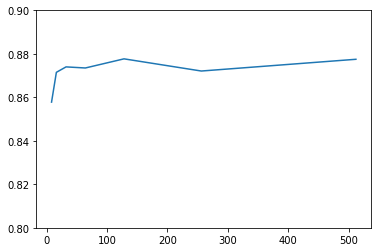

In [ ]:
hidden_ns = [8, 16, 32, 64, 128, 256, 512]

for r in results:
  print(max(r.history['val_accuracy']))

plt.ylim([0.8, 0.9])
plt.plot(hidden_ns, [max(r.history['val_accuracy']) for r in results])

30.926429841000754
32.33221839699945
33.09969862899925
36.26492964499903
37.94362811999963
45.99535296399972
68.5120346620015


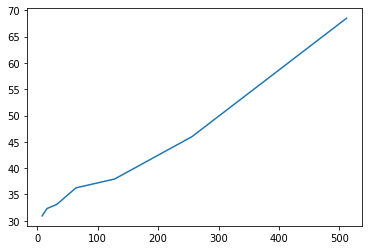

In [ ]:
for cb in callbacks:
  print(sum(cb.logs))

plt.plot(hidden_ns, [sum(cb.logs) for cb in callbacks])

Бачимо, що час навчання лінійно зростає, але в нашому випадку зміна кількості нейронів у межах від 16 до 512 не дуже впливає на точність класифікації. 8 нейронів, можливо, недостатньо.

**Побудуйте графік залежності часу навчання нейронної мережі і точності класифікації
від кількості прихованих шарів (всі приховані шари однакового розміру) для
багатошарової нейронної мережі з фіксованою функцією активації `'tanh'`**

In [ ]:
results = []
callbacks = []

for layers in [1, 2, 3, 4, 5]:

  #
  # hidden_n variable left here by accident, it is not used!
  #
  print("Neurons: ", hidden_n)

  K.clear_session()
  model = M.Sequential()
  model.add(L.Dense(28*28, activation='tanh'))
  for i in range(layers):
    print("Adding layer ", i)
    model.add(L.Dense(128, activation='tanh'))
  model.add(L.Dense(10, activation='tanh'))

  model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
  )

  callback = TimingCallback()
  callbacks.append(callback)

  results.append(model.fit(
    x_train_float.reshape(-1, 28*28),
    y_train_oh,
    batch_size=64,
    epochs=5,
    validation_data=(x_val_float.reshape(-1, 28*28), y_val_oh),
    callbacks=[callback]
  ))

Neurons:  512
Adding layer  0
Epoch 1/5
938/938 [==============================] - 9s 9ms/step - loss: 4.9122 - accuracy: 0.1012 - val_loss: 3.6126 - val_accuracy: 0.0975
Epoch 2/5
938/938 [==============================] - 8s 9ms/step - loss: 3.6390 - accuracy: 0.0984 - val_loss: 3.5702 - val_accuracy: 0.0984
Epoch 3/5
938/938 [==============================] - 8s 8ms/step - loss: 5.3184 - accuracy: 0.0967 - val_loss: 8.5361 - val_accuracy: 0.0904
Epoch 4/5
938/938 [==============================] - 8s 8ms/step - loss: 8.6756 - accuracy: 0.0927 - val_loss: 8.5687 - val_accuracy: 0.0962
Epoch 5/5
938/938 [==============================] - 8s 9ms/step - loss: 8.4191 - accuracy: 0.0948 - val_loss: 8.0527 - val_accuracy: 0.0893
Neurons:  512
Adding layer  0
Adding layer  1
Epoch 1/5
938/938 [==============================] - 9s 9ms/step - loss: 7.9946 - accuracy: 0.0996 - val_loss: 8.0591 - val_accuracy: 0.0997
Epoch 2/5
938/938 [==============================] - 8s 9ms/step - loss: 8.059

In [ ]:
# Try one more time, with 20 hidden layers

print("Neurons: ", 20)

K.clear_session()
model = M.Sequential()
model.add(L.Dense(28*28, activation='tanh'))
for i in range(20):
  print("Adding layer ", i)
  model.add(L.Dense(128, activation='tanh'))
model.add(L.Dense(10, activation='tanh'))

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

callback = TimingCallback()
callbacks.append(callback)

results.append(model.fit(
  x_train_float.reshape(-1, 28*28),
  y_train_oh,
  batch_size=64,
  epochs=5,
  validation_data=(x_val_float.reshape(-1, 28*28), y_val_oh),
  callbacks=[callback]
))

Neurons:  20
Adding layer  0
Adding layer  1
Adding layer  2
Adding layer  3
Adding layer  4
Adding layer  5
Adding layer  6
Adding layer  7
Adding layer  8
Adding layer  9
Adding layer  10
Adding layer  11
Adding layer  12
Adding layer  13
Adding layer  14
Adding layer  15
Adding layer  16
Adding layer  17
Adding layer  18
Adding layer  19
Epoch 1/5
938/938 [==============================] - 15s 15ms/step - loss: 8.0289 - accuracy: 0.1013 - val_loss: 8.0590 - val_accuracy: 0.1000
Epoch 2/5
938/938 [==============================] - 14s 15ms/step - loss: 8.0590 - accuracy: 0.1000 - val_loss: 8.0590 - val_accuracy: 0.1000
Epoch 3/5
938/938 [==============================] - 14s 15ms/step - loss: 8.0590 - accuracy: 0.1000 - val_loss: 8.0590 - val_accuracy: 0.1000
Epoch 4/5
938/938 [==============================] - 14s 15ms/step - loss: 8.0590 - accuracy: 0.1000 - val_loss: 8.0590 - val_accuracy: 0.1000
Epoch 5/5
938/938 [==============================] - 14s 15ms/step - loss: 8.0590 - a

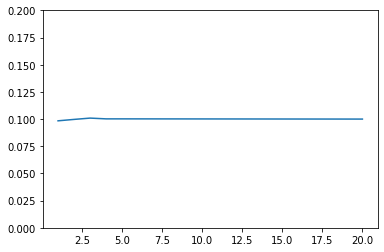

In [ ]:
layer_counts = [1, 2, 3, 4, 5, 20]

plt.ylim([0, 0.2])
plt.plot(layer_counts, [max(r.history['val_accuracy']) for r in results])

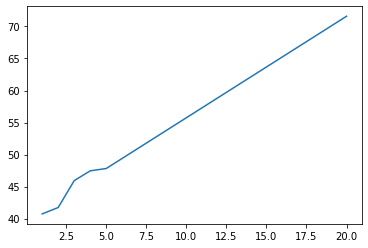

In [ ]:
plt.plot(layer_counts, [sum(cb.logs) for cb in callbacks])

Знову бачимо, що час навчання зростає, але впливу на точність класифікації немає (не більше 10%). Можливо, функція активації `tanh` просто погано підходить для таких задач.